# Assignment 3(due on 11/22)

## Student:胡蓓慧（12332288），Gtihub：beihuihu
## 批改人：吴昊天

## 得分：59/60

# 1. Niño 3.4 index

In [28]:
import numpy as np
import pandas as pd
import xarray as xr
import math
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

1.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.
https://northfar.net/nino-intro/

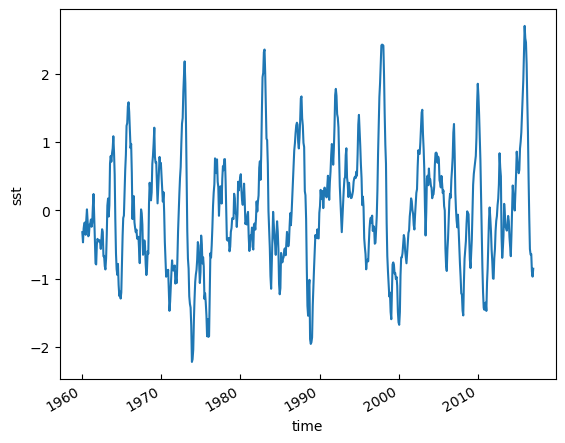

In [30]:
NiNo=ds.sst.sel(lon=slice(190, 240),lat=slice(-5, 5))#
#calculate monthly climatology for SST 
group_data=NiNo.groupby('time.month')
sst_clim=group_data.mean(dim='time')
#obtain anomalies
sst_ano=group_data-sst_clim
sst_ano=sst_ano.mean(dim=['lat','lon'])
sst_ano.plot()

1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

Text(0.5, 1.0, 'SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)')

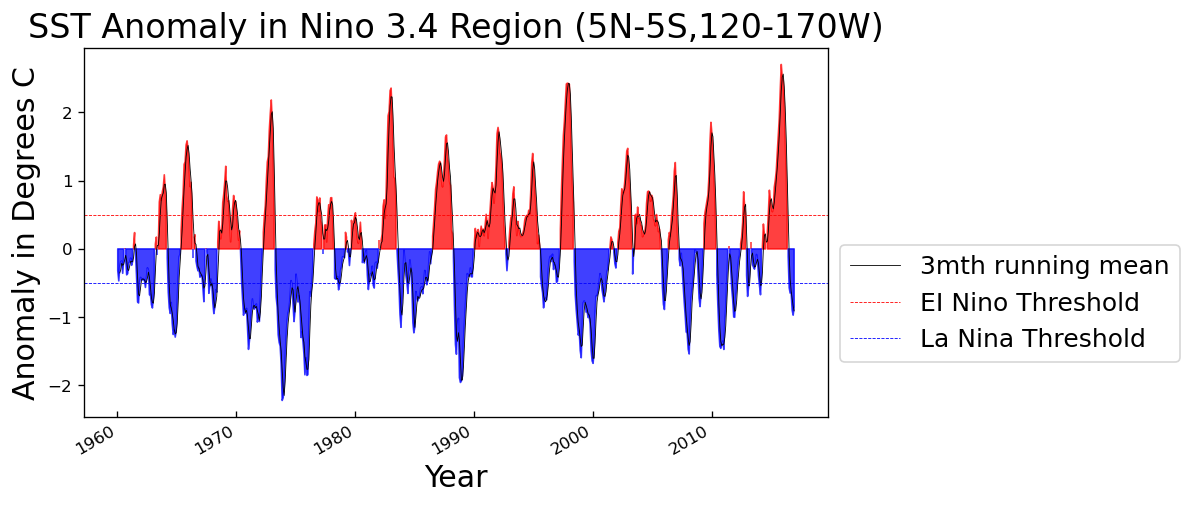

In [31]:
plt.figure(figsize=(8,4),dpi=120)
time=sst_ano.time
plt.fill_between(time, 0, sst_ano, sst_ano>0,color='red', alpha=0.75)
plt.fill_between(time, 0, sst_ano,sst_ano<0,color='blue', alpha=0.75)
nino34index=sst_ano.rolling(time=3).mean()
nino34index.plot(color='k',linewidth=0.5,label='3mth running mean')
plt.axhline(0.5,linewidth=0.5,color='red',ls='--',label='EI Nino Threshold')
plt.axhline(-0.5,linewidth=0.5,color='blue',ls='--',label='La Nina Threshold')
plt.xlabel("Year",fontsize=18)
plt.ylabel("Anomaly in Degrees C",fontsize=18)
plt.legend(fontsize=15,bbox_to_anchor=(1,0.5))
plt.title("SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)",fontsize=20)

### 1.1 从海温时间序列中减去气候学得到异常。
### 1.2 绘制了相近的图像。
### 得分：21/20

### =============================

# 2. Earth’s energy budget

problem 2

In [32]:
data = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
data

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

2.1 [5 points] Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

Text(0.5, 1.0, 'time-mean TOA longwave for all-sky conditions')

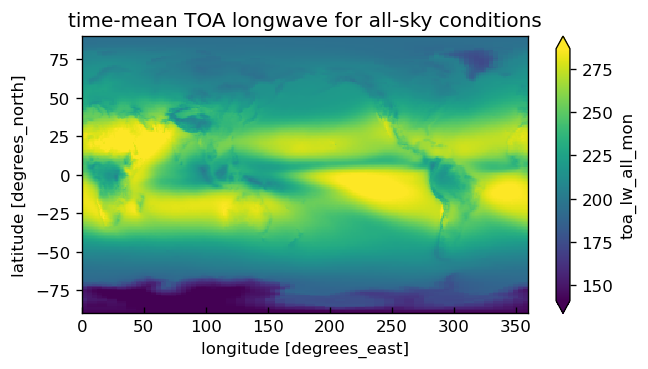

In [33]:
meanlw=data.toa_lw_all_mon.mean('time')
plt.figure(figsize=(6,3),dpi=120)
meanlw.plot(robust=True)
plt.title("time-mean TOA longwave for all-sky conditions",fontsize=12)

Text(0.5, 1.0, 'time-mean TOA shortwave for all-sky conditions')

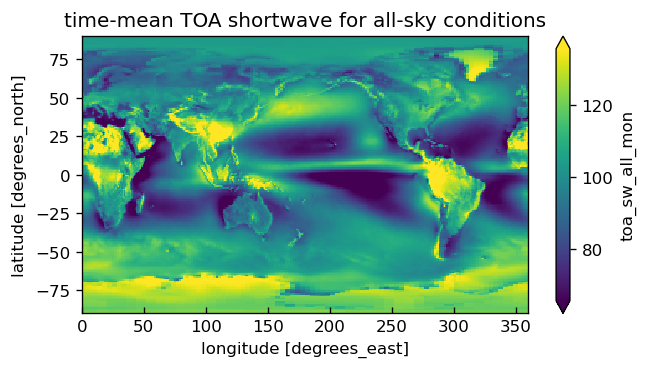

In [34]:
meanlw=data.toa_sw_all_mon.mean('time')
plt.figure(figsize=(6,3),dpi=120)
meanlw.plot(robust=True)
plt.title("time-mean TOA shortwave for all-sky conditions",fontsize=12)

Text(0.5, 1.0, 'time-mean TOA solar radiation for all-sky conditions')

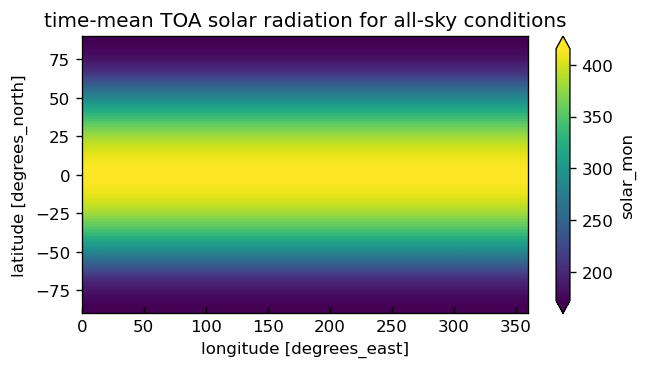

In [35]:
meanlw=data.solar_mon.mean('time')
plt.figure(figsize=(6,3),dpi=120)
meanlw.plot(robust=True)
plt.title("time-mean TOA solar radiation for all-sky conditions",fontsize=12)

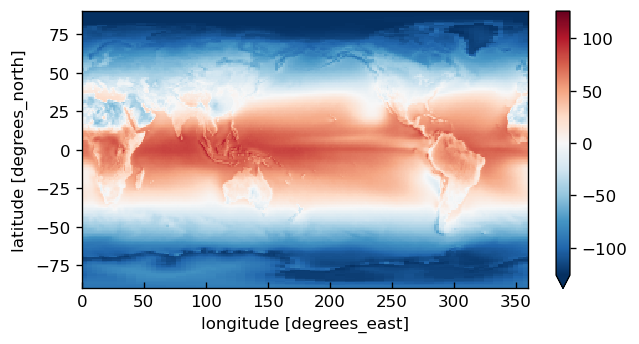

In [36]:
plt.figure(figsize=(6,3),dpi=120)
sumup=data.solar_mon-data.toa_lw_all_mon-data.toa_sw_all_mon
sumup.mean('time').plot(robust=True)

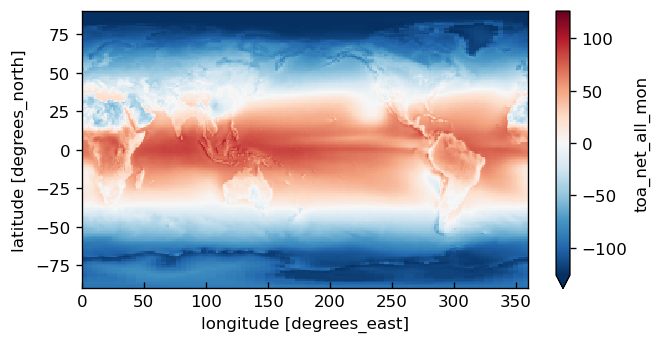

In [37]:
plt.figure(figsize=(6,3),dpi=120)
data.toa_net_all_mon.mean('time').plot(robust=True)

2.2 [10 points] Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.
area(i,j) = (pi/180.0) * R * R * abs(sin(Lat1(i)/180.0 * pi) - sin(Lat2(i)/180.0*pi)) * abs(dLon1(j) - dLon2(j));
in this problem, abs(dLon1(j) - dLon2(j))=1
https://blog.csdn.net/hydroclimate/article/details/122438081

In [38]:
#calculate the area weight of each grid
lat=data.lat
lat=abs(np.sin((lat+0.5)*math.pi/180)-np.sin((lat-0.5)*math.pi/180))
lat=lat/lat.sum()
#calculate sr
solar_radiance=data.solar_mon.mean('time')*lat
total_solar_radiance=np.array(solar_radiance.mean('lon').sum())
print(total_solar_radiance)
#calculate sw
shortwave_radiance=data.toa_sw_all_mon.mean('time')*lat
total_shortwave_radiance=np.array(shortwave_radiance.mean('lon').sum())
print(total_shortwave_radiance)
#calculate lw
longwave_radiance=data.toa_lw_all_mon.mean('time')*lat
total_longwave_radiance=np.array(longwave_radiance.mean('lon').sum())
print(total_longwave_radiance)

340.28513
99.13904
240.26797


2.3 [5 points] Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

Text(0.5, 1.0, 'the total amount of net radiation in each 1-degree latitude band')

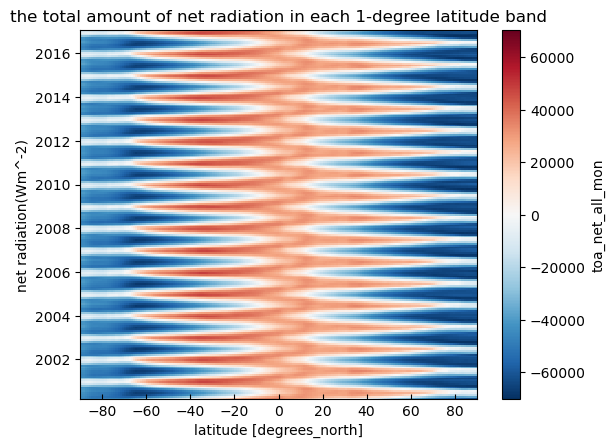

In [39]:
d1band=data.toa_net_all_mon.sum(dim='lon')
d1band.plot()
plt.ylabel('net radiation(Wm^-2)')
plt.title('the total amount of net radiation in each 1-degree latitude band')

2.4 [5 points] Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.

Text(0.5, 1.0, 'time-mean outgoing longwave for hca regions')

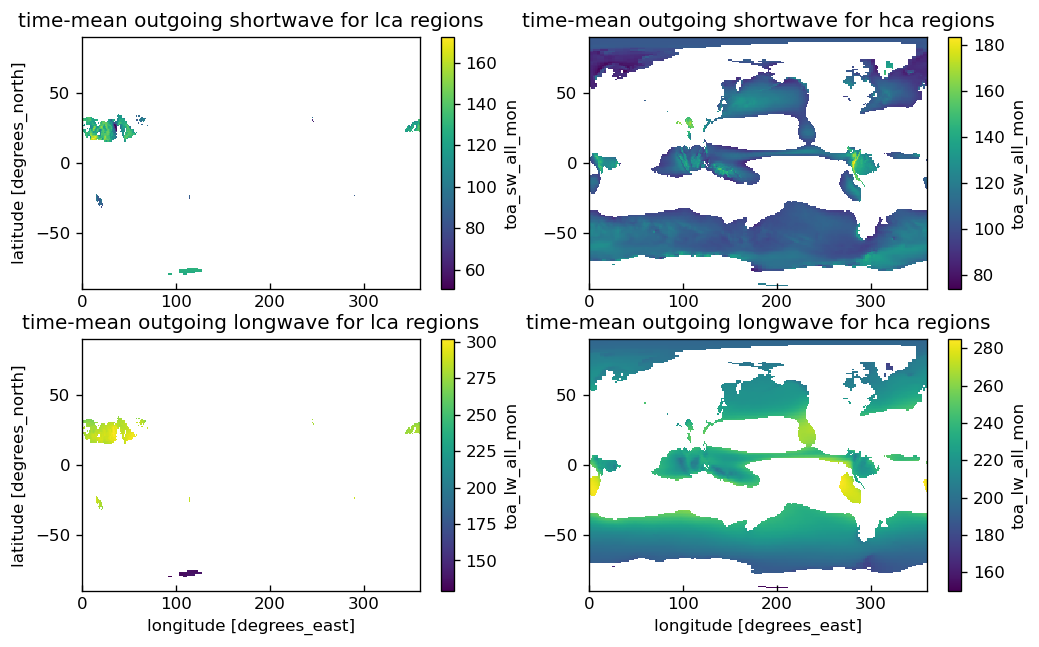

In [40]:
plt.rcParams['xtick.direction'] = 'in'
plt.figure(figsize=(10,6),dpi=120)
cld_percentage=data.cldarea_total_daynight_mon.mean('time')
plt.subplot(2,2,1)
data.toa_sw_all_mon.mean('time').where(cld_percentage<25).plot()
plt.xlabel('')
plt.title('time-mean outgoing shortwave for lca regions')
plt.subplot(2,2,2)
data.toa_sw_all_mon.mean('time').where(cld_percentage>75).plot()
plt.xlabel('')
plt.ylabel('')
plt.title('time-mean outgoing shortwave for hca regions')
plt.subplot(2,2,3)
data.toa_lw_all_mon.mean('time').where(cld_percentage<25).plot()
plt.title('time-mean outgoing longwave for lca regions')
plt.subplot(2,2,4)
data.toa_lw_all_mon.mean('time').where(cld_percentage>75).plot()
plt.ylabel('')
plt.title('time-mean outgoing longwave for hca regions')

2.5 [5 points] Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

In [41]:
##the area weight of each grid had been calculated in 2.1
total_low_area_sw_radiance=np.array(shortwave_radiance.where(cld_percentage<25).mean('lon').sum())
total_high_area_sw_radiance=np.array(shortwave_radiance.where(cld_percentage>75).mean('lon').sum())
total_low_area_lw_radiance=np.array(longwave_radiance.where(cld_percentage<25).mean('lon').sum())
total_high_area_lw_radiance=np.array(longwave_radiance.where(cld_percentage>75).mean('lon').sum())
# total_shortwave_radiance
print('the global mean values of shortwave radiation is {} while in low cloud area, it is {};in high cloud area, it is {}.'.format(total_shortwave_radiance,total_low_area_sw_radiance,total_high_area_sw_radiance))
print('the global mean values of longwave radiation is {} while in low cloud area, it is {};in high cloud area, it is {}.'.format(total_longwave_radiance,total_low_area_lw_radiance,total_high_area_lw_radiance))
cloud_sw_effect=data.toa_cre_sw_mon.mean('time')*lat
total_cloud_sw_effect=np.array(cloud_sw_effect.mean('lon').sum())
cloud_lw_effect=data.toa_cre_lw_mon.mean('time')*lat
total_cloud_lw_effect=np.array(cloud_lw_effect.mean('lon').sum())
print('the overall effect of clouds on shortwave and longwave radiation is {} and {}.'.format(total_cloud_sw_effect,total_cloud_lw_effect))

the global mean values of shortwave radiation is 99.1390380859375 while in low cloud area, it is 27.624053955078125;in high cloud area, it is 107.94964599609375.
the global mean values of longwave radiation is 240.26797485351562 while in low cloud area, it is 67.6646957397461;in high cloud area, it is 233.62255859375.
the overall effect of clouds on shortwave and longwave radiation is -45.805686950683594 and 28.010570526123047.


### 2.1 从绘制图像正确，验证了辐射平衡。
### 2.2 计算正确，能量守恒。
### 2.3 要计算总辐射单位为W而不是W/m^2。
### 2.4 图像绘制正确。先计算了常年平均然后筛选了范围。
### 2.5 计算注意面积加权。
### 得分：30/30

### =============================

# 3. Explore a netCDF dataset

3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

In [42]:
# folder_path = r'D:\2_gradulate\first_class\ese5023\nc'
# output_folder = r'D:\2_gradulate\first_class\ese5023\ESE5023_Assignments_12332288'
# nc_files = [f for f in os.listdir(folder_path) if f.endswith('.nc4')]
# ds_list = [xr.open_dataset(os.path.join(folder_path, nc_file)) for nc_file in nc_files]
# combined_ds = xr.concat(ds_list, dim="time")
# # 保存合并后的数据集为nc文件
# output_file = os.path.join(output_folder, f"GLDAS_2019_2022.nc")
# combined_ds.to_netcdf(output_file)

In [43]:
data = xr.open_dataset("GLDAS_2019_2022.nc", engine="netcdf4")
data

<xarray.Dataset>
Dimensions:             (time: 48, bnds: 2, lon: 62, lat: 36)
Coordinates:
  * time                (time) datetime64[ns] 2019-01-01 ... 2022-12-01
  * lon                 (lon) float32 73.5 74.5 75.5 76.5 ... 132.5 133.5 134.5
  * lat                 (lat) float32 18.5 19.5 20.5 21.5 ... 51.5 52.5 53.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    Qg_tavg             (time, lat, lon) float32 ...
    SoilMoi0_30cm_inst  (time, lat, lon) float32 ...
    Wind_f_inst         (time, lat, lon) float32 ...
    Rainf_f_tavg        (time, lat, lon) float32 ...
    Psurf_f_inst        (time, lat, lon) float32 ...
Attributes: (12/20)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2020-02-03T14:41:00.188
    source:                 VIC_v4.1.2 forced with GDAS-AGRMET-GPCPv13rA1
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0
    history_L34RS:          'Created by L34RS v1.4.3 @ NASA GES DISC on Novem...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

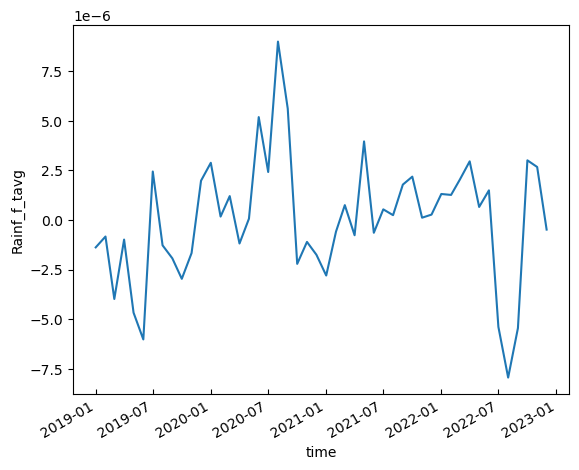

In [44]:
month_data=data.Rainf_f_tavg.groupby('time.month')
ano_data=month_data-month_data.mean(dim='time')
ano_data.mean(dim=['lat','lon']).plot()

3.2 [5 points] Make at least 5 different plots using the dataset.

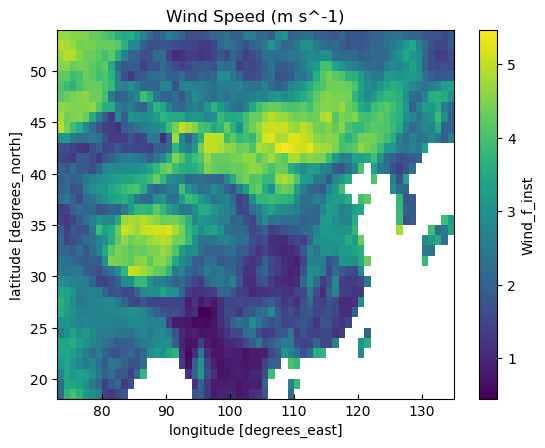

In [45]:
data.Wind_f_inst.mean('time').plot()
plt.title('Wind Speed (m s^-1)')
plt.savefig('p3_2_1')

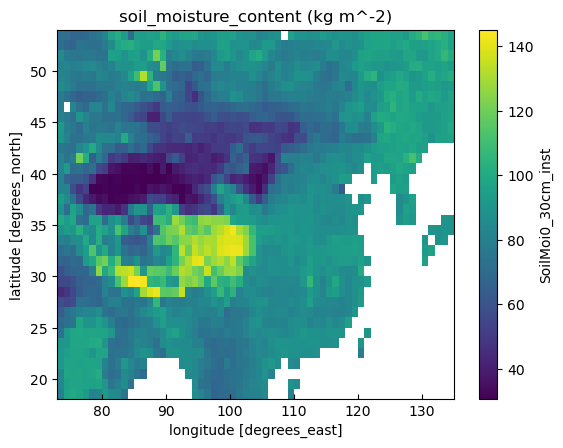

In [46]:
data.SoilMoi0_30cm_inst.mean('time').plot()
plt.title('soil_moisture_content (kg m^-2)')
plt.savefig('p3_2_5')

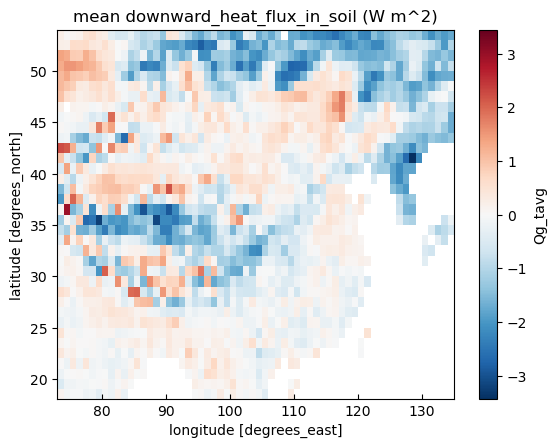

In [47]:
data.Qg_tavg.mean('time').plot()
plt.title('mean downward_heat_flux_in_soil (W m^2)')
plt.savefig('p3_2_2')

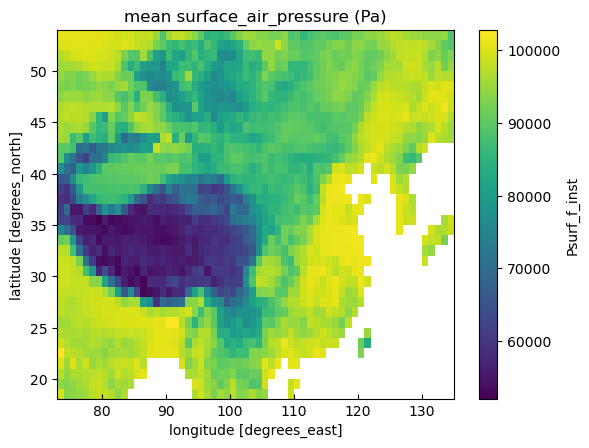

In [48]:
data.Psurf_f_inst.mean('time').plot()
plt.title('mean surface_air_pressure (Pa)')
plt.savefig('p3_2_3')

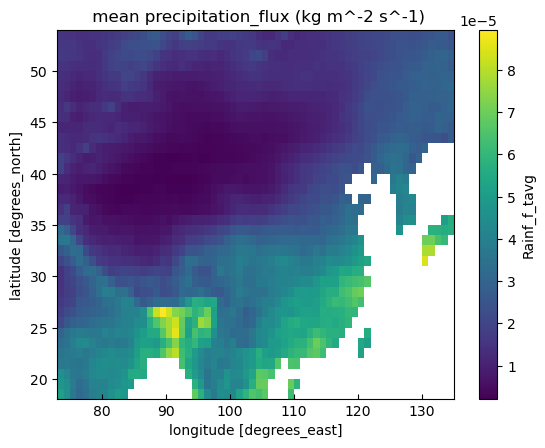

In [49]:
data.Rainf_f_tavg.mean('time').plot()
plt.title(' mean precipitation_flux (kg m^-2 s^-1)')
plt.savefig('p3_2_4')

### 3.1 滑动平均能够在一定程度上去除季节性信号，满足题目要求。
### 3.2 满足题目要求。
### 得分：10/10

### =============================